## Homework 2

Here we use K-nearest neighbors to predict digits using the canonical LSTM data set. Then, we use OLS to predict restuarant revenue from data about it's performance.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt;
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18.5, 10.5

import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Load in data, split it up into independent and dependent variables

In [2]:
test = pd.read_csv("~/Documents/Math352/hw2/Problem7_test.csv")
train = pd.read_csv("~/Documents/Math352/hw2/Problem7_train.csv")

x_train = train.values[:,1:785] #leave out first column bc that is the answer
y_train = train.values[:, 0] #gets just the label which is the answer
x_test = test.values[:,1:785]

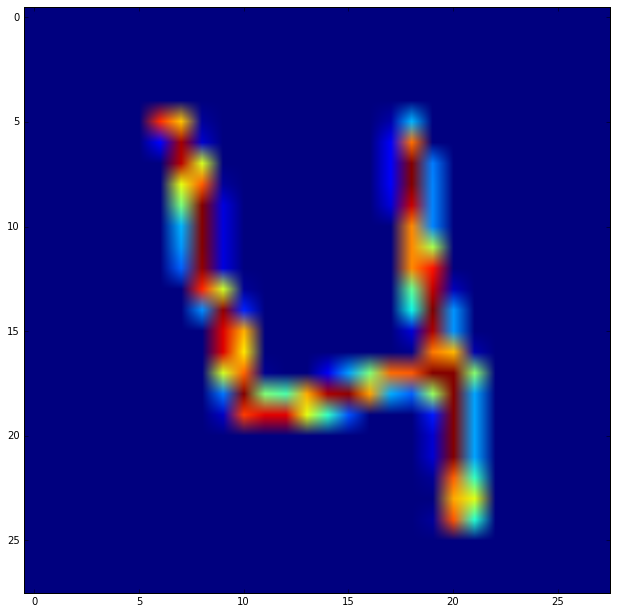

In [3]:
#show image of the 3rd observation
imgplot = plt.imshow(x_train[3,:].reshape(28,28)) #reshape it into 28X28 picture

Get a KNN classifier and use good 'ole euclidean distance as the distance metric

In [4]:
knn = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'minkowski')
knn.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [7]:
# predict values
y_pred = knn.predict(x_test) 
knn_pred = pd.DataFrame({'id' : range(1,2001), 'label' : y_pred})
#****************submit to kaggle******************#

Next, we do some OLS on restaurant data to predict revenue

In [9]:
train = pd.read_csv("Problem8_train.csv")
test = pd.read_csv("Problem8_test.csv")

train.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,2,3.0,4.0,3.0,1,5,5,5,5,5,...,3.0,5,5,5,3,4,4,3,1,2740687
1,3,5.0,4.0,4.0,2,5,5,4,5,4,...,2.0,0,0,0,0,0,0,0,0,5461700
2,4,5.0,4.0,4.0,2,3,5,4,4,4,...,2.0,4,1,2,2,3,4,3,2,3818055
3,3,5.0,4.0,4.0,2,2,5,1,4,4,...,2.0,5,5,3,3,3,4,3,2,6836483
4,4,5.0,5.0,4.0,1,5,5,3,4,5,...,1.0,5,5,4,3,3,4,4,1,4554237


In [10]:
test.head()

,ID,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1,4,5.0,4.0,4.0,2,2,5,4,5,...,2.0,3.0,5,3,4,5,5,4,3,4
1,2,4,5.0,4.0,4.0,1,2,5,5,5,...,3.0,3.0,0,0,0,0,0,0,0,0
2,3,2,4.0,2.0,5.0,2,3,5,5,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,4,6,4.5,6.0,6.0,4,4,10,8,10,...,2.5,7.5,25,12,10,6,18,12,12,6
4,5,3,4.0,3.0,4.0,2,2,5,5,5,...,1.0,3.0,5,1,3,2,3,4,3,3


In [11]:
x_train = train.values[:,0:37]
x_test = test.values[:,1:38]

y_train = train[['revenue']].values #revenue


Prep independent variables for OLS by adding in a constant

In [13]:
x_train, x_test = sm.add_constant(x_train), sm.add_constant(x_test)


Let it rip

In [14]:
#fit the model to our data
result = sm.OLS(y_train, x_train).fit()

print(result.summary())

y_pred = result.predict(x_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     1.430
Date:                Tue, 06 Sep 2016   Prob (F-statistic):              0.105
Time:                        14:53:13   Log-Likelihood:                -1578.5
No. Observations:                 100   AIC:                             3233.
Df Residuals:                      62   BIC:                             3332.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       6.195e+06   4.39e+06      1.411      0.1

A fairly noisy model with an R-squared of 